In [1]:
%matplotlib inline

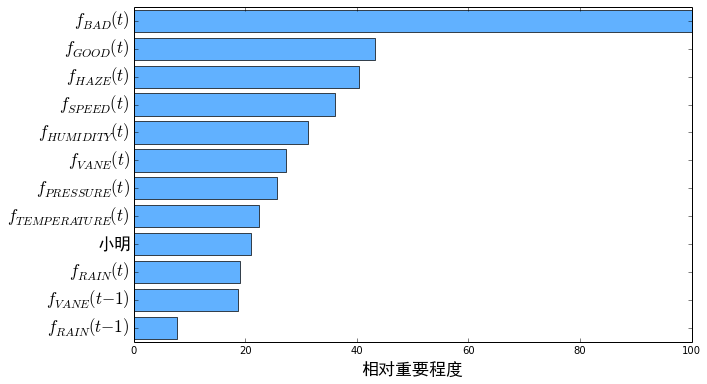

In [2]:
"""
Simple demo of a horizontal bar chart.
"""
import matplotlib
import numpy as np
import pylab as pl
    
###############################################################################

myFonts=matplotlib.font_manager.FontProperties(fname='C:\Windows\Fonts\simhei.ttf',size=17)
feature_importance =[0.049675318,0.044260025,0.018438522,0.10184021,0.235851252,0.052822766,
                    0.073514282,0.060421558,0.085140958,0.064218269,0.04505646,0.095216695]
feature_importance=np.array(feature_importance)
selectedFetureName=[u'${f}_{VANE}(t-1)$',u'${f}_{VANE}(t-1)$',u'${f}_{RAIN}(t-1)$',
                    u'${f}_{GOOD}(t)$',u'${f}_{BAD}(t)$',u'${f}_{TEMPERATURE}(t)$',
                    u'${f}_{HUMIDITY}(t)$',u'${f}_{PRESSURE}(t)$',u'${f}_{SPEED}(t)$',
                    u'${f}_{VANE}(t)$',u'${f}_{RAIN}(t)$',u'${f}_{HAZE}(t)$']

selectedFetureName=np.array(selectedFetureName)
#    for item in feature_importance:
#        print item
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
pl.figure(figsize=(10,6))
pl.barh(pos, feature_importance[sorted_idx], align='center',
        color = 'dodgerblue',alpha=0.7)    
pl.yticks(pos, selectedFetureName[sorted_idx],fontproperties=myFonts)
pl.xlabel(u'相对重要程度',fontproperties=myFonts)
#    pl.title('Variable Importance')   
#    pl.title('Variable Importance')
pl.savefig('importance.png',dpi=600)
pl.show()    

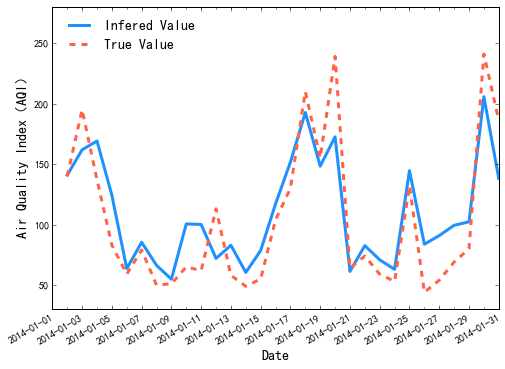

In [4]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 18 17:32:53 2014

@author: wybert
"""
#!/usr/bin/env python

import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DayLocator, HourLocator, DateFormatter, drange
from numpy import arange
from pylab import *
from matplotlib import font_manager
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体    
mpl.rcParams['axes.unicode_minus'] = False #解决保存图像是负号'-'显示为方块的问题  

date1 = datetime.datetime( 2014, 1,1)
date2 = datetime.datetime( 2014, 2, 1)
ano_data1=datetime.datetime(2014,1,4)
ano_data2=datetime.datetime(2014,1,29)
delta = datetime.timedelta(days=1)
dates = drange(date1, date2, delta)

yuce = [140.9567755,161.8410016,169.0671561,124.1812133,63.59256192,
   85.38060554,66.2796499,54.84091033,100.5580178,
   100.0616063,72.01559851,82.86171372,60.43276844,
   78.54032241,117.1404531,151.6780152,192.6726835,
   148.2830049,172.5401516,61.27984489,82.57630155,
   70.8378985,62.94671623,144.5930435,83.72872484,
   90.87926726,99.40385484,102.2463733,205.7449561,138.1208759]

turev=[140,195,137,83,59,79,50,51,65,62,113,58,49,55,104,130,210
   ,155,239,64,74,59,53,132,44,54,69,80,241,186]

###
# 224.0968737	216
# 206.9996126	200
# 245.2632999	139



wuhan_yuce=[
224.0968737,
206.9996126,
245.2632999,
172.6777264,207.9948069,239.813837,228.0041793,276.372454,
    198.0042141,194.2714792,225.4104112,229.1397868,278.0735523,
    231.5864109,218.7843477,249.5622595,287.2735573,261.7396953,
    234.3131794,78.45851204,140.2813516,104.9803694,173.3827768,
    247.7783965,326.0088644,288.8823473,253.5209723,248.420538,
    241.8349566,181.8148755]
wuhan_aqi=[
216,
200,
139,
196,254,306,248,260,163,123,210,320,268,204,166,290,
    282,273,180,97,122,133,173,298,334,263,345,337,205,236]


# f=plt.figure(figsize=(10,6))
myFonts=font_manager.FontProperties(
                fname='C:\Windows\Fonts\simhei.ttf',size=14)


fig, ax = plt.subplots(figsize=(8,6))

ax.plot_date(dates[1:], yuce,'-',label = u'Infered Value',color='dodgerblue',linewidth=3)

ax.plot_date(dates[1:], turev,'--',label = u'True Value',color='tomato',linewidth=3)

ax.legend(loc='upper left',prop=myFonts,frameon=False)

# plt.annotate('2014.1.4',
#     xy=(ano_data1, 250), arrowprops=dict(arrowstyle='->'), xytext=(ano_data1-2*delta, 270))
# plt.annotate('2014.1.29',
#     xy=(ano_data2, 250), arrowprops=dict(arrowstyle='->'), xytext=(ano_data2-2*delta, 200))

plt.xlabel(u'Date',fontproperties=myFonts)
plt.ylabel(u'Air Quality Index（AQI）',fontproperties=myFonts)
# this is superfluous, since the autoscaler should get it right, but
# use date2num and num2date to convert between dates and floats if
# you want; both date2num and num2date convert an instance or sequence
ax.set_xlim( dates[0], dates[-1] )
ax.set_ylim( 30,280)
# The hour locator takes the hour or sequence of hours you want to
# tick, not the base multiple



ax.xaxis.set_major_locator( DayLocator(interval=2) )
ax.xaxis.set_minor_locator( HourLocator(arange(0,49,24)) )
ax.xaxis.set_major_formatter( DateFormatter('%Y-%m-%d') )

ax.fmt_xdata = DateFormatter('%Y-%m-%d %H:%M:%S')
fig.autofmt_xdate()

plt.show()

# plt.scatter(wuhan_aqi,wuhan_yuce)
# plt.show()
# plt.scatter(yuce,turev)
# plt.show()

#### 就算rmse

In [7]:
sh_error=np.array(yuce) - np.array(turev)
wh_error=np.array(wuhan_yuce) - np.array(wuhan_aqi)
print 'shRMSE:',np.sqrt(np.square(sh_error).mean())
print 'whRMSE:',np.sqrt(np.square(wh_error).mean())
print np.max(turev),np.min(turev),np.max(wuhan_aqi),np.min(wuhan_aqi)

shRMSE: 28.0704539046
whRMSE: 47.4441833616
241 44 345 97


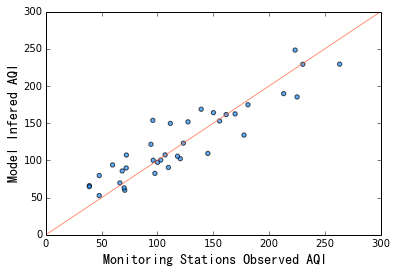

In [6]:
import matplotlib
import numpy as np
import pylab as pl
from matplotlib import font_manager

beijing_predict=np.array([  85.79322466,  100.20699897,   69.69825746,  107.21973506,
        161.58834603,  109.35354819,  168.78315711,   59.91989468,
        189.73371587,   90.47410345,  123.19732587,  151.82215487,
        185.32208779,  174.83013768,   66.06749407,  153.85146379,
        102.26082194,   82.55310236,   64.72173527,   63.08067142,
         93.92006219,  121.6823226 ,  248.27754708,  134.02236762,
         52.73609712,  152.94461553,  105.65259015,  229.20862393,
        162.52378467,  164.17759803,   89.82952836,  149.74777994,
         79.62563297,  100.43366921,  229.37249395,  107.43212905,
         97.40079541])

bj_true=np.array([68.43478260869566, 96.17391304347827, 66.34782608695652,
       72.13636363636364, 161.56521739130434, 145.1818181818182,
       139.17391304347825, 70.73913043478261, 213.08695652173913,
       109.78260869565217, 123.21739130434783, 127.3913043478261,
       225.13636363636363, 181.1304347826087, 39.0, 95.8695652173913,
       120.47826086956522, 97.73913043478261, 38.95652173913044,
       70.1304347826087, 59.82608695652174, 94.21739130434783,
       223.34782608695653, 177.56521739130434, 47.82608695652174,
       155.69565217391303, 117.95652173913044, 230.2608695652174,
       169.6086956521739, 150.1304347826087, 72.0, 111.56521739130434,
       47.869565217391305, 102.91304347826087, 263.2608695652174,
       106.86363636363636, 100.1304347826087])
myFonts=font_manager.FontProperties(
                fname='C:\Windows\Fonts\simhei.ttf',size=14)

max=300
x=range(max)
pl.plot(x,x,c='tomato',alpha=0.7)  
pl.scatter(bj_true,beijing_predict,marker='8',c='dodgerblue',alpha=0.7)
pl.xlim(0,max)
pl.ylim(0,max)

pl.xlabel(u'Monitoring Stations Observed AQI',fontproperties=myFonts)
pl.ylabel(u'Model Infered AQI',fontproperties=myFonts)
pl.show()


In [9]:
wuhan_error

array([  -8.0968737 ,   -6.9996126 , -106.2632999 ,   23.3222736 ,
         46.0051931 ,   66.186163  ,   19.9958207 ,  -16.372454  ,
        -35.0042141 ,  -71.2714792 ,  -15.4104112 ,   90.8602132 ,
        -10.0735523 ,  -27.5864109 ,  -52.7843477 ,   40.4377405 ,
         -5.2735573 ,   11.2603047 ,  -54.3131794 ,   18.54148796,
        -18.2813516 ,   28.0196306 ,   -0.3827768 ,   50.2216035 ,
          7.9911356 ,  -25.8823473 ,   91.4790277 ,   88.579462  ,
        -36.8349566 ,   54.1851245 ])